In [2]:
import sys
sys.path.append("..")

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from SGHMC.sghmc import sghmc

# Applications to simulated data
## Example 1: Reimplement Figure 1 on page 6

In [17]:
np.random.seed(663)
n = 200
x = np.zeros((200, 1))
theta_0 = np.array([0])
p = theta_0.shape[0]
eps = 0.1
C = np.eye(1)
V_hat = np.eye(1)*4
batch_size = 5
n_iter = 5000
inv_M = np.eye(p)
burn_in = 200

def noisy_gradU(theta, x, n, batch_size):
    '''noisy gradient from paper fig1'''
    return -4*theta + 4*theta**3 + np.random.normal(0,2)

sim = sghmc(noisy_gradU, eps, C, inv_M, theta_0, V_hat, x, batch_size, burn_in, n_iter)
# original
x_o = np.random.random(2000)
y_o = -4 * x_o + 4* x_o ** 3


In [22]:
print(sim[0,:].shape)

(4800,)


[[0.2606022359854082, -0.971615277649446], [0.2763228168366999, -1.0208975273221346], [0.662241734493966, -1.4872250974083439], [0.2981433780832271, -1.0865662802406693], [0.34956965050997, -1.2274104382661573], [0.7079867463986006, -1.4124470587410443], [0.6656757561700818, -1.4827948441399443], [0.9649349613034502, -0.26593808415346487], [0.6725275797121193, -1.4733913230438744], [0.9523706318315047, -0.3542444644938141], [0.9455536090589739, -0.4006438192814179], [0.34965351603607586, -1.2276228915228786], [0.3350836106409222, -1.189840316008449], [0.12021710217013937, -0.4739188255125991], [0.7206858031306065, -1.3854809035012758], [0.632827265335169, -1.5175948412788287], [0.29570866220519254, -1.0794033136608123], [0.3178439759327244, -1.142935416184608], [0.7081983956669793, -1.4120202169596263], [0.789155920030114, -1.190782412011418], [0.25729936719199464, -0.9610615454264049], [0.6711171225740874, -1.4753887352164676], [0.42295967154393366, -1.389177401084256], [0.62123339736

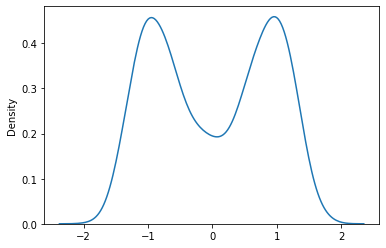

In [25]:
plt1 = sns.kdeplot(sim[0,:])
data = []
for each_x, each_y in zip(x_o, y_o):
    data.append([each_x,each_y])
print(data)

# plt.suptitle("Figure1: Density Plot Generated by SGHMC")
fig1 = plt1.get_figure()
fig1.savefig("figure1.png")

## Example 2: Mixture of Normals

In [4]:
from autograd import jacobian
import autograd.numpy as np

In [5]:
# compute log(theta)
def log_prior(theta):
    return (-1/(2*10))*theta.T@theta

# compute log(x\theta)
def log_like(theta, x):
    return np.log(0.5 * np.exp(-0.5*(theta[0]-x)**2) + 0.5* np.exp(-0.5*(theta[1]-x)**2))

# function of U(theta)
def U(theta, x, n, batch_size):
    return -log_prior(theta) - (n/batch_size)*sum(log_like(theta, x))

gradU = jacobian(U, argnum = 0)

In [6]:
np.random.seed(663)
n = 200
theta_0 = np.array([0,0])
p = theta_0.shape[0]
theta = np.array([-3,3]).reshape(p,1)
x = np.r_[np.random.normal(theta[0], 1, (n,1)),
              np.random.normal(theta[1], 1, (n,1))].reshape(-1,1)
eps = 0.01
C = np.eye(p)
V_hat = np.eye(p)
batch_size = 80
n_iter = 5000
inv_M = np.eye(p)
burn_in = 100

sim2 = sghmc(gradU, eps, C, inv_M, theta_0, V_hat, x, batch_size, burn_in, n_iter)

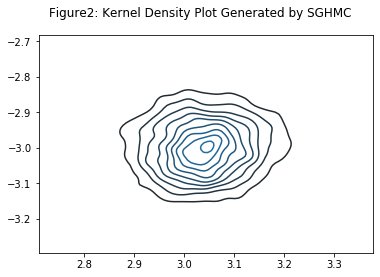

In [7]:
plt2 = sns.kdeplot(sim2[0,:],sim2[1,:])
plt.suptitle("Figure2: Kernel Density Plot Generated by SGHMC")
fig2 = plt2.get_figure()
fig2.savefig("fig2_sghmc.png")